In [5]:
# Manipulación de datos
import pandas as pd

# Operaciones numéricas
import numpy as np

# Para medir el tiempo que toma ejecutar los procesos
from time import time

# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Librería para SVM (Support Vector Machine)
from sklearn.svm import SVC

# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix

# Generar gráficos
import matplotlib.pyplot as plt

In [7]:
# Leemos el set de datos y lo cargamos en la variable diabetes_df, que es un DataFrame
df = pd.read_csv('digitos.csv')   

# Mostrar información sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
# Mostrar las primeras filas del DataFrame
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: >

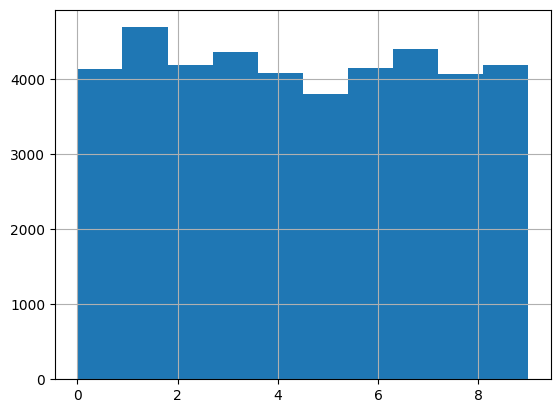

In [11]:
df['label'].hist()

In [12]:
#obtener una seccion del dataframe usando los numeros de columna
pixeles = df.iloc[:,1:785] #x
digitos = df.iloc[:,0:1] #y

In [13]:
#separar datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [14]:
#consultar informacion de la muestra de entrenamiento 
X_train.shape

(21000, 784)

In [15]:
#Luego, la cantidad de datos a utilozar para
X_train.head


<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
27756       0       0       0       0       0       0       0       0       0   
41013       0       0       0       0       0       0       0       0       0   
36984       0       0       0       0       0       0       0       0       0   
30104       0       0       0       0       0       0       0       0       0   
34559       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
18258       0       0       0       0       0       0       0       0       0   
41685       0       0       0       0       0       0       0       0       0   
21217       0       0       0       0       0       0       0       0       0   
27250       0       0       0       0       0       0       0       0       0   
28748       0       0       0       0       0       0       0       0       0  

In [16]:
def mostrar_num(in_data):
    """genera un gráfico que muuestra un registro del det de datos
    para ello, convierte el array de 1 dimensión en una matriz de 28x28"""
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28,28))

In [17]:
X_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


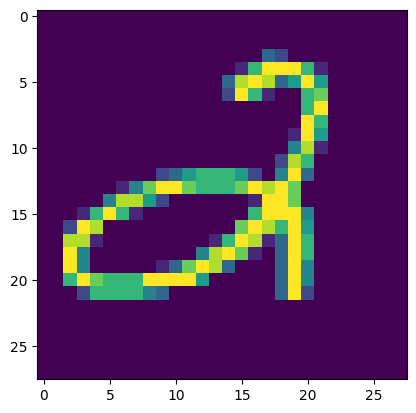

In [18]:
mostrar_num(X_test.iloc[3])

In [19]:
#creacio del modelo
modelo = SVC(kernel='linear')

In [20]:
#entrenamiento
hora_inicio= time()
modelo.fit(X_train.values, y_train.values.ravel())
#Mostramos el tiempo tomado para la predicción
print("entrenamieto terminado en {}" .format(time()-hora_inicio))

entrenamieto terminado en 20.704136610031128


In [22]:
#crear prediccion de datos
hora_inicio=time()
y_pred=modelo.predict(X_test.values)
print('Prediccion terminada en {}'.format(time()-hora_inicio))
print(y_pred.shape)

Prediccion terminada en 19.811537504196167
(21000,)


In [23]:
precision = accuracy_score(y_test,y_pred)
print(f'Preision: {precision}')

Preision: 0.9113809523809524


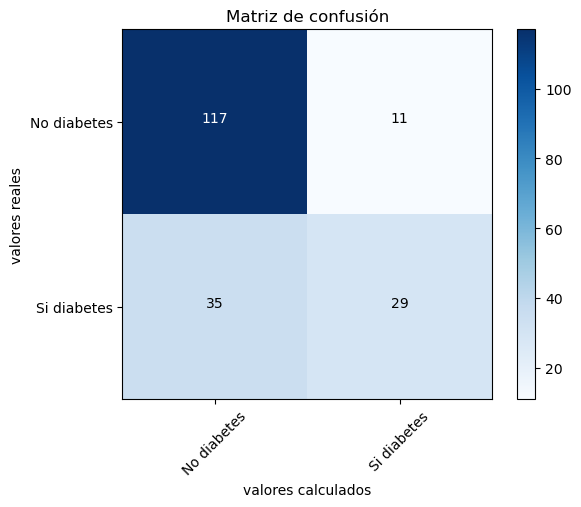

In [30]:

def plot_cm(cm, classes):
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh=cm.max()/2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color="white"
            else:
                color="black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"  
            )
    plt.ylabel("valores reales")
    plt.xlabel("valores calculados")
    plt.show()

#Generamos el grafico llamadp la funcion que creamos y envindo los parametros
#cm  muestra matriz de confusion (conf_diabetes)
#clases = las clases a predecir (si tienen diabetes o no)
plot_cm(conf_diabetes, ['No diabetes', 'Si diabetes'])

    